# **WeatherPy**
---
## Module 6- Python API Challenge- Part I
### By: Zack Crowley
#### 11/7/22

### **Analysis**
---
####  Discussion of Temperature vs. Latitude Linear Regression Plots:
- For the northern hemisphere, there is a strong negative relationship between temperature and latitude. As latitude increases, the max tempature goes down. This makes perfect sense, as you travel north from the equator, max temperatures will get lower and lower. 
- For the southern hemisphere, there was a fairly strong positive relationship between temperature and latitude. Since the southern hemisphere is contains all negative latitude, as latitude increases, getting closer to the equator, max temperatures increase. This is simple an inverse of the relationship between temperature and latitude in the northern hemisphere. As you move away from the equator, max temperatures decrease. 
- Interestingly, the relationship between temperature and latitude is weaker for the southern hemishpere (r=0.60), compared to the northern hemisphere (r=-.86). This is probably due to the fact that the northern hemisphere has greater landmass than the southern hemisphere. When citipy generates the list of cities, it gathered 381 cities from the northern hemishere and 175 from the southern hemisphere. So the data was biased to the northern hemisphere and the linear regression was stronger for that analysis. If I had more time, I would have found a way to have citipy return a more balanced list of cities between the two hemispheres. 

####  Discussion of Humidity vs. Latitude Linear Regression Plots:
- For the northern hemisphere, there was a weak positive relationship humidity and latitude(r=.29). As latitude increases, going farther north away from the equator, the humidity slightly goes up.
- For the southern hemisphere, there was also a weak positive relationship humidity and latitude(r=.27). As latitude increases, the humidity slightly goes up. However, this means that as you move closer to the equator, humidity goes up, which is opposite the trend of the northern hemisphere.
- The differences in the relationship between humidity and latitude is probably attributable to the fact that the northern hemisphere is moving into the fall/winter season and the southern hemisphere is moving into the spring/summer season. The jet streams are probably switching whereby more wet air is farther north in the northern hemisphere farther from the equator and also in the southern hemispher more wet air is north but this is closer to the equator.
  
####  Discussion of Cloudiness vs. Latitude Linear Regression Plots:
- Again for the northern hemisphere, there was a weak positive relationship cloudiness and latitude(r=.22). As latitude increases, going farther north away from the equator, cloudiness slightly goes up.
- For the southern hemisphere, there was also a weak positive relationship cloudiness and latitude (r=.32). As latitude increases,  cloudiness percentage slightly goes up. However, this means that as you move closer to the equator, cloudiness goes up, which is opposite the trend of the northern hemisphere.
- Similar to humidity, the differences in the relationship between cloudiness and latitude is again likely due to the seasons being opposite in that the northern hemisphere is moving into the fall/winter season and the southern hemisphere is moving into the spring/summer season. The jet streams are probably switching whereby more clouds are farther north in the northern hemisphere, farther from the equator and also in the southern hemisphere more clouds gather in the north but this is closer to the equator.
  
####  Discussion of Wind Speed vs. Latitude Linear Regression Plots:
- The relationship betwen wind speed and latitude is the opposite of that of temperature and latitude, and very weak. For the northern hemisphere, there is a very weak positive relationship between wind speed and latitude(r=.17). As latitude increases, wind speed goes up. 
- For the southern hemisphere, there was a very weak negative relationship between temperature and latitude(r=-.22). As latitude increases, getting closer to the equator, wind speds decrease. This is simple an inverse of the relationship between wind speed and latitudein the northern hemisphere. As you move away from the equator, wind speeds increase. 
- Wind speeds are probably stronger as you move away from the equator because of the jet streams or because there is more wind where hot and cold air meet, which is generally farther north in the northern hemisphere and farther south in the southern hemisphere.
---
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define unit as metric:
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pravia
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | umm lajj
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | batagay-alyta
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | darhan
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | kamenka
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count:
city_data_df.count()
# 556 cities with full data

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        pravia  43.4906   -6.1508     11.38        76          20   
1  norman wells  65.2820 -126.8329    -12.98        72          75   
2        atuona  -9.8000 -139.0333     25.18        71          67   
3     busselton -33.6500  115.3333     10.45        83           0   
4    butaritari   3.0707  172.7902     26.35        73         100   

   Wind Speed Country        Date  
0        2.06      ES  1667676596  
1        5.66      CA  1667676596  
2        6.15      PF  1667676597  
3        4.80      AU  1667676597  
4        4.66      KI  1667676597

In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

# Also export to VacationPy folder for use in Part 2 of the assignment:
city_data_df.to_csv("../VacationPy/cities.csv", index_label="City_ID")



In [2]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0              pravia  43.4906   -6.1508     11.38        76          20   
1        norman wells  65.2820 -126.8329    -12.98        72          75   
2              atuona  -9.8000 -139.0333     25.18        71          67   
3           busselton -33.6500  115.3333     10.45        83           0   
4          butaritari   3.0707  172.7902     26.35        73         100   

         Wind Speed Country        Date  
City_ID                                  
0              2.06      ES  1667676596  
1              5.66      CA  1667676596  
2              6.15      PF  1667676597  
3              4.80      AU  1667676597  
4              4.66      KI  1667676597

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

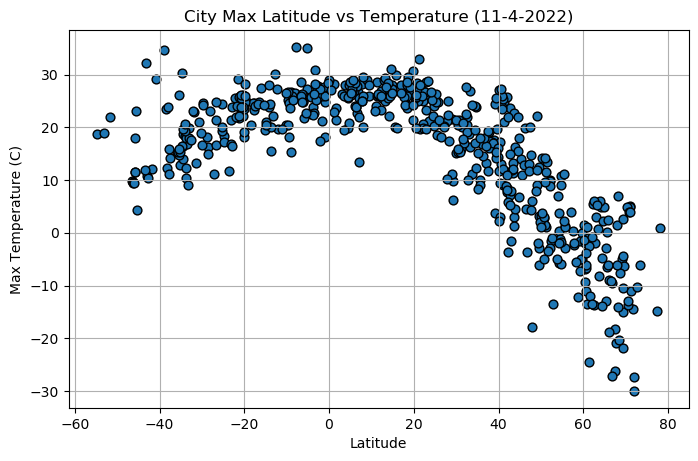

In [32]:
# Build scatter plot for latitude vs. temperature
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Max Temp', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (11-4-2022)")
plt.grid()
# Set figure size:
plt.rcParams["figure.figsize"] = (8,5)

# Save the figure:
plt.savefig("output/Fig1.png")


# Show plot:
plt.show()

#### Latitude Vs. Humidity

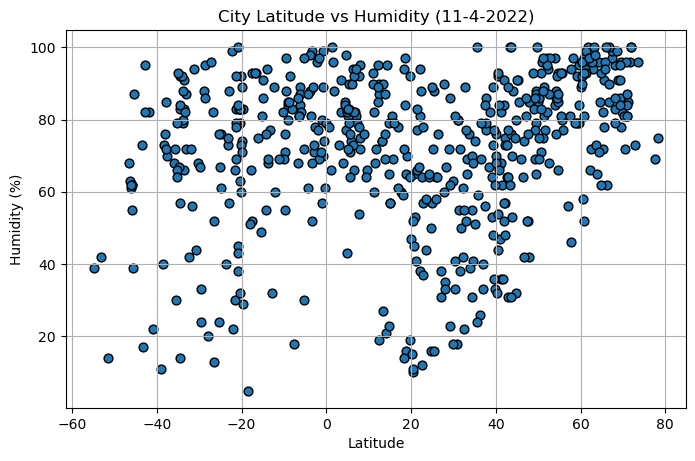

In [33]:
# Build the scatter plots for latitude vs. humidity
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Humidity', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

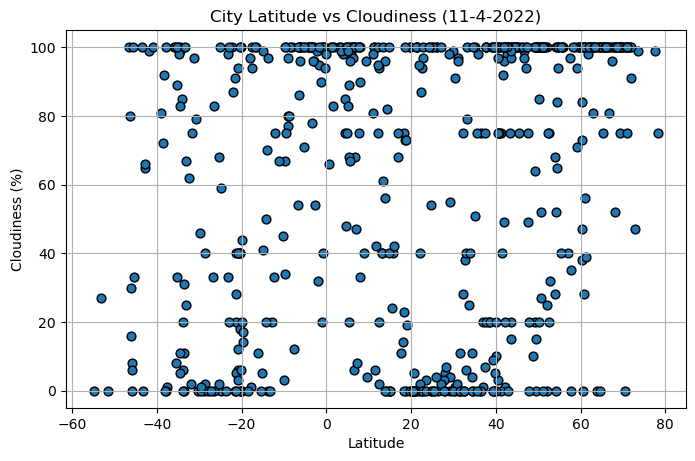

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Cloudiness', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

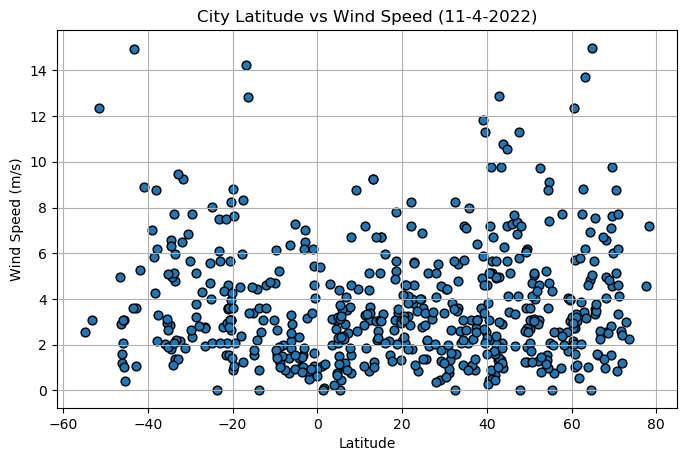

In [35]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat', y='Wind Speed', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def reg_plot(x_vals, y_vals, eq_coord, y_label, title):
    # Run the linear regression:
    slope, int, r, p, std_err = linregress(x_vals,y_vals)
    # Create the fitted values for the line of best fit:
    line_fit = (slope * x_vals) + int 
    # Create the equation for the line of best fit:
    line_eq = f"y={round(slope,2)}x + {round(int,2)}"
    # Print the corr (r-value):
    print(f"The r-value is: {r}")
    # Create a scatter plot and plot the regression line:
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals, line_fit, color="r")
    plt.annotate(line_eq, eq_coord,fontsize=15, color ="r")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [3]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Count data:
print(northern_hemi_df.count())
# Display sample data
northern_hemi_df.head()

City          381
Lat           381
Lng           381
Max Temp      381
Humidity      381
Cloudiness    381
Wind Speed    381
Country       381
Date          381
dtype: int64


City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0              pravia  43.4906   -6.1508     11.38        76          20   
1        norman wells  65.2820 -126.8329    -12.98        72          75   
4          butaritari   3.0707  172.7902     26.35        73         100   
5               tiksi  71.6872  128.8694    -14.43        96         100   
8            umm lajj  25.0213   37.2685     24.75        57         100   

         Wind Speed Country        Date  
City_ID                                  
0              2.06      ES  1667676596  
1              5.66      CA  1667676596  
4              4.66      KI  1667676597  
5              2.61      RU  1667676598  
8              3.59      SA  1667676599

In [4]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Count data:
print(southern_hemi_df.count())
# Display sample data
southern_hemi_df.head()

City          175
Lat           175
Lng           175
Max Temp      175
Humidity      175
Cloudiness    175
Wind Speed    175
Country       167
Date          175
dtype: int64


City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
2           atuona  -9.8000 -139.0333     25.18        71          67   
3        busselton -33.6500  115.3333     10.45        83           0   
6           noumea -22.2763  166.4572     25.56        99         100   
7            vaini -21.2000 -175.2000     24.09        83          40   
13           ancud -41.8697  -73.8203     12.17        82          99   

         Wind Speed Country        Date  
City_ID                                  
2              6.15      PF  1667676597  
3              4.80      AU  1667676597  
6              2.78      NC  1667676023  
7              3.60      TO  1667676598  
13             5.27      CL  1667676601

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8566749211969426


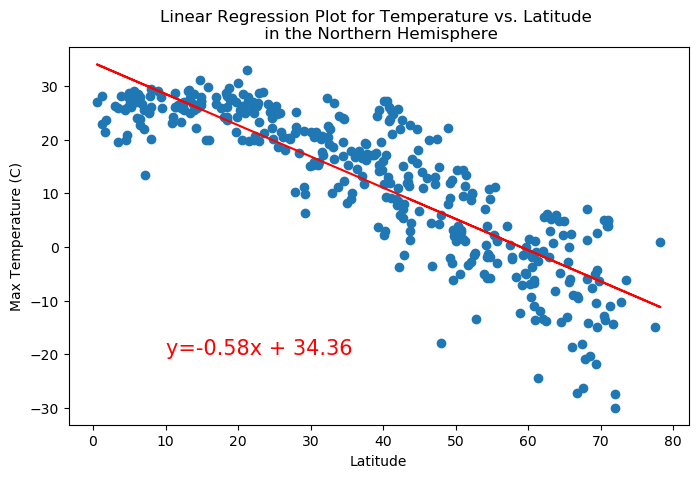

In [52]:
# Linear regression on Northern Hemisphere
# Use reg_plot function to make full plot:
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-20), 
        "Max Temperature (C)", "Linear Regression Plot for Temperature vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.5959786407772226


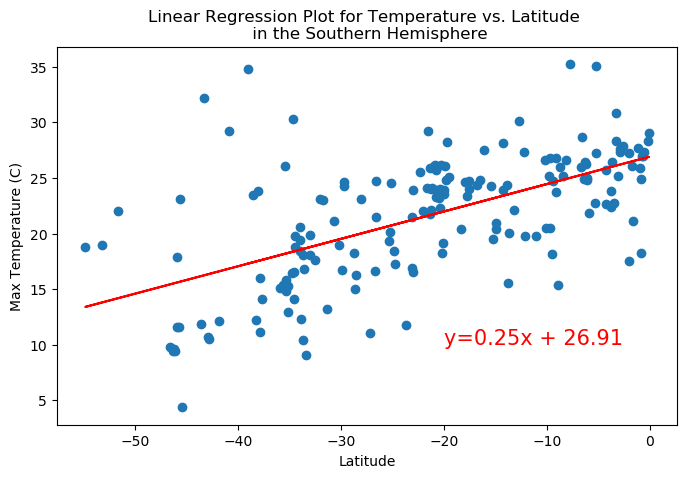

In [53]:
# Linear regression on Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-20,10), 
        "Max Temperature (C)", "Linear Regression Plot for Temperature vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** 
- For the northern hemisphere, there is a strong negative relationship between temperature and latitude. As latitude increases, the max tempature goes down. This makes perfect sense, as you travel north from the equator, max temperatures will get lower and lower. 
- For the southern hemisphere, there was a fairly strong positive relationship between temperature and latitude. Since the southern hemisphere is contains all negative latitude, as latitude increases, getting closer to the equator, max temperatures increase. This is simple an inverse of the relationship between temperature and latitude in the northern hemisphere. As you move away from the equator, max temperatures decrease. 
- Interestingly, the relationship between temperature and latitude is weaker for the southern hemishpere (r=0.60), compared to the northern hemisphere (r=-.86). This is probably due to the fact that the northern hemisphere has greater landmass than the southern hemisphere. When citipy generates the list of cities, it gathered 381 cities from the northern hemishere and 175 from the southern hemisphere. So the data was biased to the northern hemisphere and the linear regression was stronger for that analysis. If I had more time, I would have found a way to have citipy return a more balanced list of cities between the two hemispheres. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2861445910106671


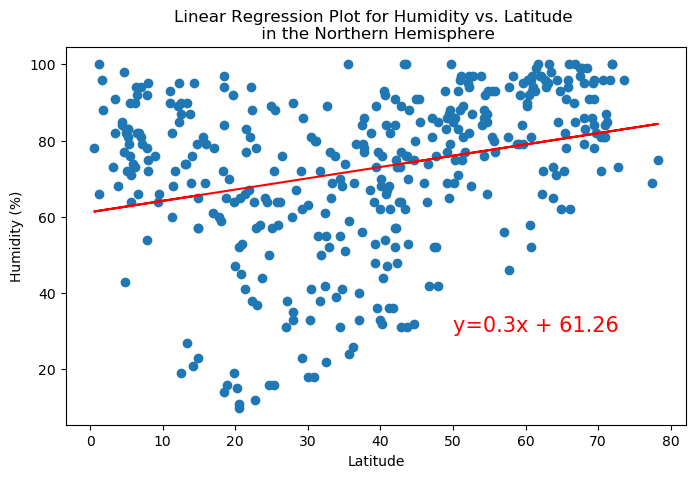

In [56]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,30), 
        "Humidity (%)", "Linear Regression Plot for Humidity vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.27355794503659625


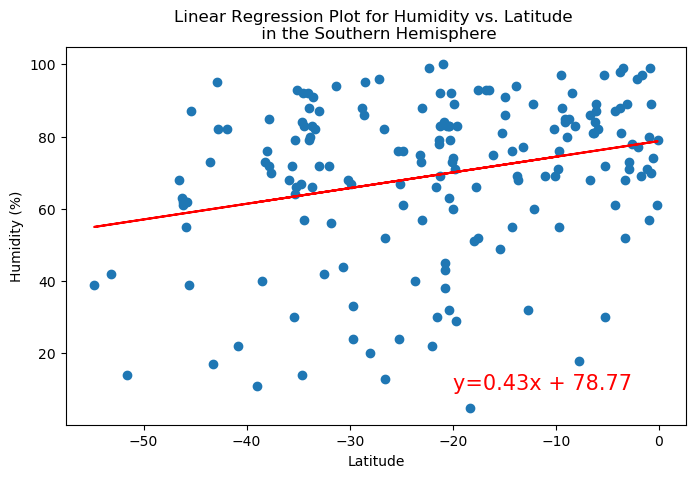

In [54]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-20,10), 
        "Humidity (%)", "Linear Regression Plot for Humidity vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** 
- For the northern hemisphere, there was a weak positive relationship humidity and latitude(r=.29). As latitude increases, going farther north away from the equator, the humidity slightly goes up.
- For the southern hemisphere, there was also a weak positive relationship humidity and latitude(r=.27). As latitude increases, the humidity slightly goes up. However, this means that as you move closer to the equator, humidity goes up, which is opposite the trend of the northern hemisphere.
- The differences in the relationship between humidity and latitude is probably attributable to the fact that the northern hemisphere is moving into the fall/winter season and the southern hemisphere is moving into the spring/summer season. The jet streams are probably switching whereby more wet air is farther north in the northern hemisphere farther from the equator and also in the southern hemispher more wet air is north but this is closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2181657147626314


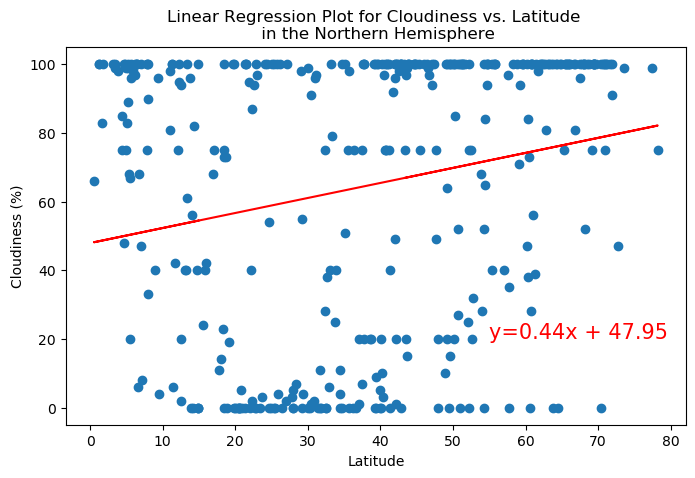

In [59]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55,20), 
        "Cloudiness (%)", "Linear Regression Plot for Cloudiness vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.3192073090927437


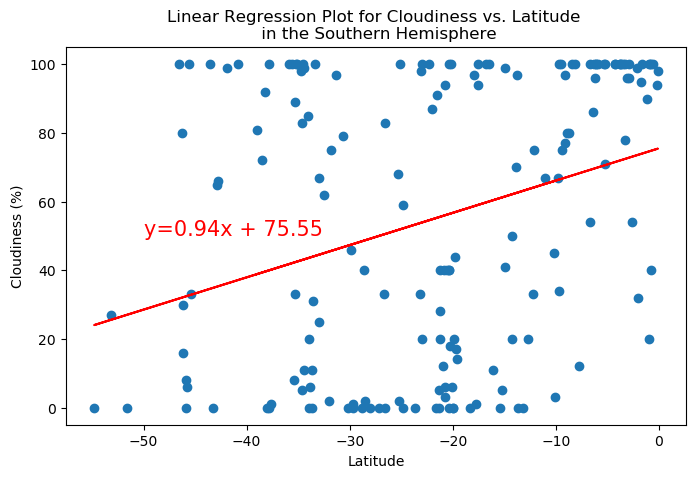

In [61]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50,50), 
        "Cloudiness (%)", "Linear Regression Plot for Cloudiness vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** 
- Again for the northern hemisphere, there was a weak positive relationship cloudiness and latitude(r=.22). As latitude increases, going farther north away from the equator, cloudiness slightly goes up.
- For the southern hemisphere, there was also a weak positive relationship cloudiness and latitude (r=.32). As latitude increases,  cloudiness percentage slightly goes up. However, this means that as you move closer to the equator, cloudiness goes up, which is opposite the trend of the northern hemisphere.
- Similar to humidity, the differences in the relationship between cloudiness and latitude is again likely due to the seasons being opposite in that the northern hemisphere is moving into the fall/winter season and the southern hemisphere is moving into the spring/summer season. The jet streams are probably switching whereby more clouds are farther north in the northern hemisphere, farther from the equator and also in the southern hemisphere more clouds gather in the north but this is closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.174668619283396


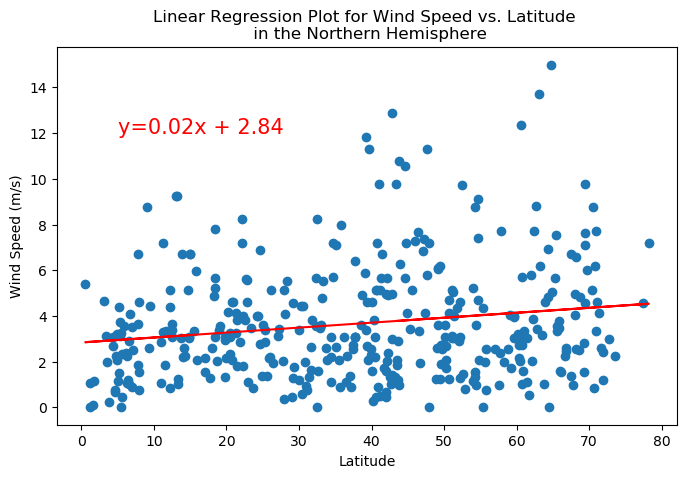

In [66]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (5,12), 
        "Wind Speed (m/s)", "Linear Regression Plot for Wind Speed vs. Latitude \n in the Northern Hemisphere")

The r-value is: -0.21508464369789296


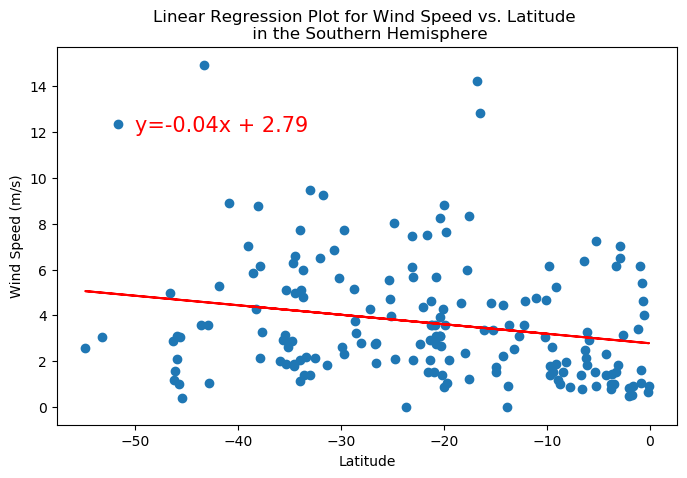

In [64]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50,12), 
        "Wind Speed (m/s)", "Linear Regression Plot for Wind Speed vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** 
- The relationship betwen wind speed and latitude is the opposite of that of temperature and latitude, and very weak. For the northern hemisphere, there is a very weak positive relationship between wind speed and latitude(r=.17). As latitude increases, wind speed goes up. 
- For the southern hemisphere, there was a very weak negative relationship between temperature and latitude(r=-.22). As latitude increases, getting closer to the equator, wind speds decrease. This is simple an inverse of the relationship between wind speed and latitudein the northern hemisphere. As you move away from the equator, wind speeds increase. 
- Wind speeds are probably stronger as you move away from the equator because of the jet streams or because there is more wind where hot and cold air meet, which is generally farther north in the northern hemisphere and farther south in the southern hemisphere.